C:\Users\22150\AppData\Local\Temp\ipykernel_22360\247054158.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_var_ready = df_selected.fillna(method='ffill')
C:\Users\22150\mynewenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


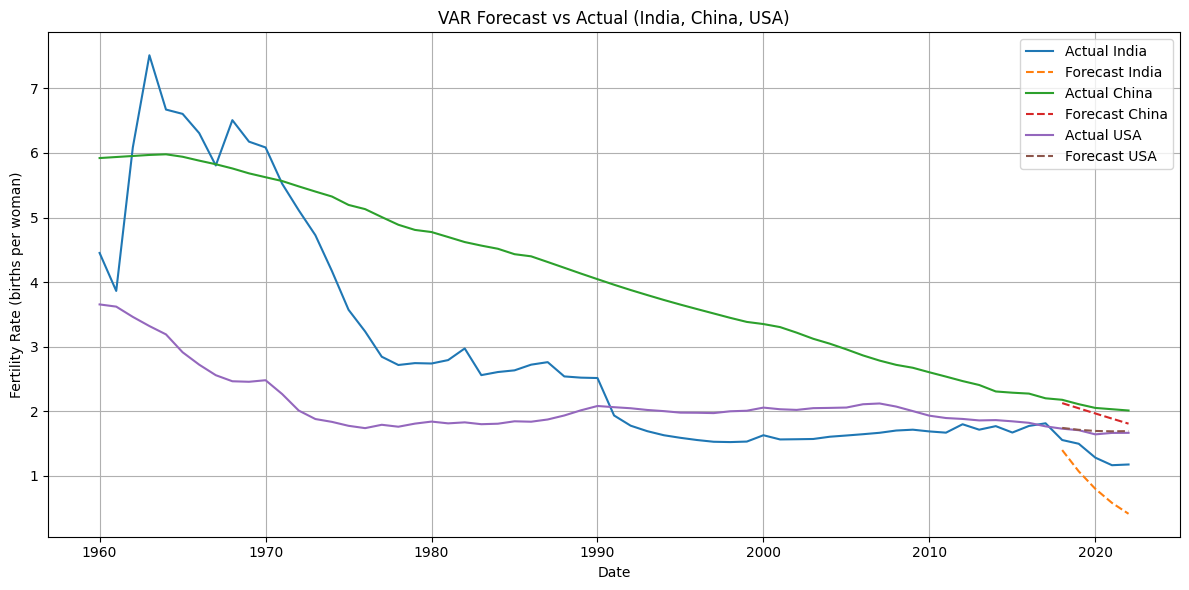

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Load your data
df = pd.read_csv(r"C:\Users\22150\Downloads\Birthrate.csv", skiprows=4)

# Filter for India, China, and USA
countries_of_interest = ['India', 'China', 'United States']
df_selected = df[df['Country Name'].isin(countries_of_interest)]

# Set country as index and transpose year columns
df_selected = df_selected.set_index('Country Name').loc[:, '1960':'2022'].transpose()

# Rename columns for easier access
df_selected.columns = ['India', 'China', 'USA']

# Convert year index to datetime format
df_selected.index = pd.to_datetime(df_selected.index, format='%Y')

# Fill missing values
df_var_ready = df_selected.fillna(method='ffill')

# Split into training and testing data (last 5 years as test)
train = df_var_ready[:-5]
test = df_var_ready[-5:]

# Fit the VAR model with a safe lag of 2
model = VAR(train)
results = model.fit(2)

# Forecast the next 5 years
lag_order = results.k_ar
forecast_input = train.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=5)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=test.index, columns=train.columns)

# Plot the results
plt.figure(figsize=(12, 6))
for country in df_selected.columns:
    plt.plot(df_selected.index, df_selected[country], label=f'Actual {country}')
    plt.plot(forecast_df.index, forecast_df[country], linestyle='--', label=f'Forecast {country}')

plt.title('VAR Forecast vs Actual (India, China, USA)')
plt.xlabel('Date')
plt.ylabel('Fertility Rate (births per woman)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
